In [ ]:

# 기존 구조: nested 딕셔너리 만들기
req_parameter_nested = {
    region: {
        district: PREFIX[region] + suffix[-3:]
        for district, suffix in districts.items()
    }
    for region, districts in SUFFIX.items()
}

# 평탄화(flatten) + 시단위 전체 지역 코드 추가
req_parameter = {}

for region, districts in req_parameter_nested.items():
    # 시 전체 ('서울') 코드: '강남구'처럼 직접 접근할 수 있도록
    if '전체' in districts:
        req_parameter[region] = districts['전체']  # ex) '서울': '101000'
    # 각 구/군도 추가
    for district, code in districts.items():
        req_parameter[district] = code

req_parameter2={
    '지역별':'domestic',
    '직업별':'job-category',
    '역세권별':'subway',
    'HOT100':'hot100',
    '헤드헌팅':'headhunting'
}


NameError: name 'SUFFIX' is not defined

In [ ]:

url = "https://www.saramin.co.kr/zf_user/jobs/list/{지역별}?loc_cd={서울}&panel_type=&search_optional_item=n&search_done=y&panel_count=y&preview=y".format(**req_parameter2, **req_parameter)
print(url)
req_header = {
    'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/135.0.0.0 Safari/537.36'
}

res = requests.get(url, headers = req_header)
res.encoding = 'utf-8'

job_link_list = []
logo_list = []
title_list =[]
corp_list = []
local_list = []
exp_list = []
grad_list = []
date_list = []
badge_list = []
if res.ok:
    html = res.text
    soup = BeautifulSoup(html, 'html.parser') 
    # CSS 선택자
    a_tag_list = soup.select("div.wrap_list_banner ul.list_product li.item a[href*='/zf_user/jobs/relay/view?view_type=list&rec']")
    # <a> 태그 리스트 순회하기    
    for a_tag in a_tag_list:
        # 링크
        job_link_dict = {}
        job_link_dict['링크'] = "https://www.saramin.co.kr" + a_tag['href']
        job_link_list.append(job_link_dict)

        # 로고
        logo_dict = {}
        if len(a_tag.select("span.logo img[src*='banner_logo/company/logo_banner/']")) == 0:
            logo_dict['로고'] = 'Null'
        else:
            img_url = a_tag.select("span.logo img[src*='banner_logo/company/logo_banner/']")
            logo_dict['로고'] = img_url[0]['src']
        logo_list.append(logo_dict)

        # 제목
        title_dict = {}
        if len(a_tag.select("strong.tit")) == 0:
            title_dict['제목'] = 'Null'
        else:
            title = a_tag.select("strong.tit")[0].text
            title_dict['제목'] = title
        title_list.append(title_dict)

        # 회사
        corp_dict = {}
        if len(a_tag.select("span.corp")) == 0:
            corp_dict['회사'] = 'Null'
        else:
            corp = a_tag.select("span.corp")[0].text
            corp_dict['회사'] = corp
        corp_list.append(corp_dict)
        
        # 지역, 경력, 학력
        temp = a_tag.select("ul.desc li")
        local_dict = {}
        exp_dict = {}
        grad_dict = {}
        if len(temp) >= 3:
            local_dict['지역'] = temp[0].get_text(strip=True)
            exp_dict['요구경력'] = temp[1].get_text(strip=True)
            grad_dict['최소학력'] = temp[2].get_text(strip=True)
        else:
            local_dict['지역'] = 'NULL'
            exp_dict['요구경력'] = 'NULL'
            grad_dict['최소학력'] = 'NULL'
        local_list.append(local_dict)
        exp_list.append(exp_dict)
        grad_list.append(grad_dict)

        for region in local_list:
            if region['지역'].endswith(' 외'):
                region['지역'] = region['지역'][:-2]

        # 기간
        date_dict = {}
        if len(a_tag.select("span.date")) == 0:
            date_dict['기간'] = 'Null'
        else:
            date = a_tag.select("span.date")[0].text
            date_dict['기간'] = date
        date_list.append(date_dict)

        clean_date = []
        for item in date_list:
            clean_item = {key: re.sub(r'\s+', ' ', value).strip() for key, value in item.items()}
            clean_date.append(clean_item)

        # 배지
        badge_dict = {}
        if len(a_tag.select("span.badge span")) == 0:
            badge_dict['배지'] = 'Null'
        else:
            badge = a_tag.select("span.badge span")[0].text
            badge_dict['배지'] = badge
        badge_list.append(badge_dict)

    else:
        # 응답(response)이 Error 이면 status code 출력    
        print(f'에러 코드 1= {res.status_code}')


https://www.saramin.co.kr/zf_user/jobs/list/domestic?loc_cd=101000&panel_type=&search_optional_item=n&search_done=y&panel_count=y&preview=y
에러 코드 1= 200


In [ ]:

combined_list = []
for link, logo, title, corp, local, exp, grad, date, badge in zip(job_link_list, logo_list, title_list, corp_list, local_list, exp_list, grad_list, clean_date, badge_list):
    merged_dict = {}
    merged_dict.update(link)
    merged_dict.update(logo)
    merged_dict.update(title)
    merged_dict.update(corp)
    merged_dict.update(local)
    merged_dict.update(exp)
    merged_dict.update(grad)
    merged_dict.update(date)
    merged_dict.update(badge)
    combined_list.append(merged_dict)


In [ ]:

# DataFrame으로 변환
df = pd.DataFrame(combined_list)
print(job_link_list)
df.head()

[{'링크': 'https://www.saramin.co.kr/zf_user/jobs/relay/view?view_type=list&rec_idx=50473499'}, {'링크': 'https://www.saramin.co.kr/zf_user/jobs/relay/view?view_type=list&rec_idx=50373915'}, {'링크': 'https://www.saramin.co.kr/zf_user/jobs/relay/view?view_type=list&rec_idx=50242003'}, {'링크': 'https://www.saramin.co.kr/zf_user/jobs/relay/view?view_type=list&rec_idx=50507916'}, {'링크': 'https://www.saramin.co.kr/zf_user/jobs/relay/view?view_type=list&rec_idx=50459170'}, {'링크': 'https://www.saramin.co.kr/zf_user/jobs/relay/view?view_type=list&rec_idx=50196065'}, {'링크': 'https://www.saramin.co.kr/zf_user/jobs/relay/view?view_type=list&rec_idx=50442896'}, {'링크': 'https://www.saramin.co.kr/zf_user/jobs/relay/view?view_type=list&rec_idx=50327882'}, {'링크': 'https://www.saramin.co.kr/zf_user/jobs/relay/view?view_type=list&rec_idx=50407549'}, {'링크': 'https://www.saramin.co.kr/zf_user/jobs/relay/view?view_type=list&rec_idx=50432464'}, {'링크': 'https://www.saramin.co.kr/zf_user/jobs/relay/view?view_type=l

,링크,로고,제목,회사,지역,요구경력,최소학력,기간,배지
0,https://www.saramin.co.kr/zf_user/jobs/relay/v...,https://www.saraminbanner.co.kr/banner_logo/co...,정보지원센터 직원 채용,서울사이버대학교,NULL,NULL,NULL,오늘마감,인기있는
1,https://www.saramin.co.kr/zf_user/jobs/relay/v...,https://www.saraminbanner.co.kr/banner_logo/co...,신입사원 모집,현대종합금속㈜,NULL,NULL,NULL,D-4,영업·판매·무역 지원 TOP100
2,https://www.saramin.co.kr/zf_user/jobs/relay/v...,https://www.saraminbanner.co.kr/banner_logo/co...,SNS광고 영상 편집자 채용,주식회사에이치케이엔,NULL,NULL,NULL,~05.13(화),인기있는
3,https://www.saramin.co.kr/zf_user/jobs/relay/v...,https://www.saraminbanner.co.kr/banner_logo/co...,화장품 관련 각 부문 직원,㈜셀아이콘랩,NULL,NULL,NULL,~05.14(수),인기있는
4,https://www.saramin.co.kr/zf_user/jobs/relay/v...,https://www.saraminbanner.co.kr/banner_logo/co...,회계부서/수행비서 채용,㈜네잎클로버벤쳐스,서울 강남구,경력,학력무관,~04.30(수),인기있는


In [ ]:
df.replace("NULL", np.nan, inplace=True)
for i in df.columns :
    missingValueRate = df[i].isna().sum() / len(df) * 100
    if missingValueRate > 0 :
        print("{} 결측치 비율: {}%".format(i,round(missingValueRate, 2)))

지역 결측치 비율: 7.84%
요구경력 결측치 비율: 7.84%
최소학력 결측치 비율: 7.84%


In [ ]:
df.shape

(51, 9)

In [ ]:

df.dropna(axis = 0, inplace=True)
df.shape

(47, 9)

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

font_path = 'C:\\windows\\Fonts\\malgun.ttf'
font_prop = fm.FontProperties(fname=font_path).get_name()


matplotlib.rc('font', family=font_prop)

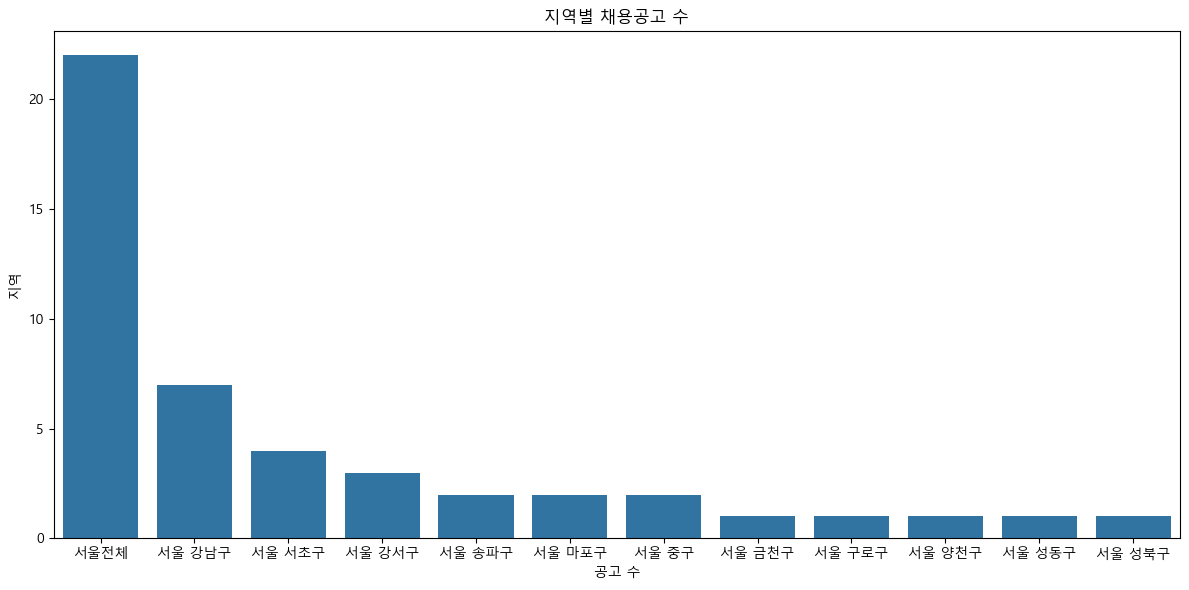

In [ ]:

# 지역별 공고 수
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='지역', order=df['지역'].value_counts().index)
plt.title('지역별 채용공고 수')
plt.xlabel('공고 수')
plt.ylabel('지역')
plt.tight_layout()
plt.show()

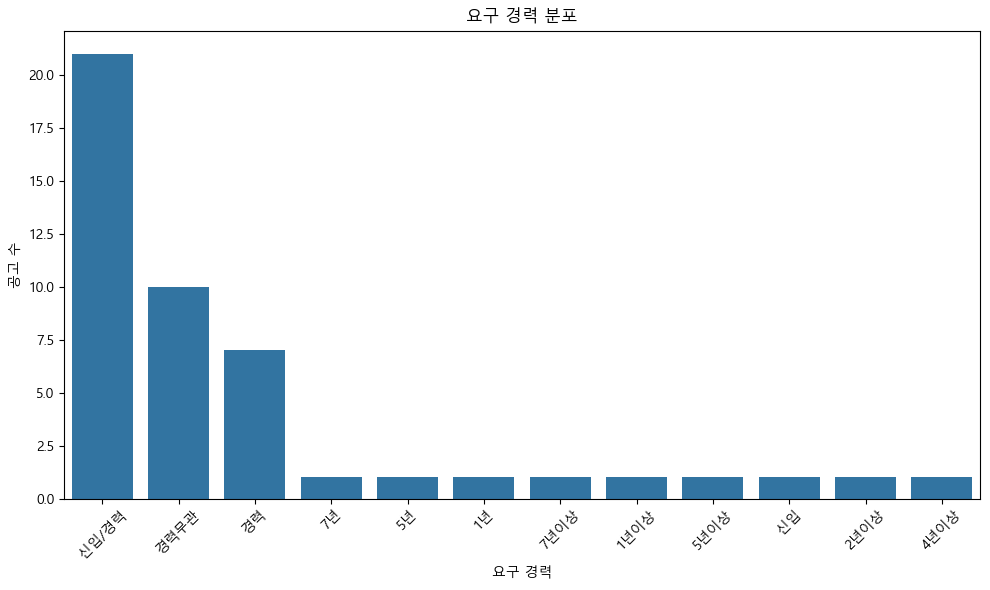

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='요구경력', order=df['요구경력'].value_counts().index)
plt.title('요구 경력 분포')
plt.xlabel('요구 경력')
plt.ylabel('공고 수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()